In [1]:
import pandas as pd
import os.path
import csv
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
#loading data and visualize it 
filename = 'final_data_v3.csv'
donnees = pd.read_csv(filename)
donnees.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.519951,0.045853,1612.895795,1411.838677,2907.580566,0.107019,-376.876007,111.017372,-31.904015,6.622254,...,-7.439712,-1.034580,-0.203084,-3.513495,-1.745704,-3.011878,-2.878482,-2.106427,-4.026825,1
1,0.535472,0.001771,2892.087076,2467.408141,5072.664388,0.148584,-519.158447,60.781284,-13.722884,52.145428,...,-0.909972,7.216461,-1.719630,3.903021,3.653039,3.043882,2.439958,2.781968,2.195162,1
2,0.496666,0.033657,3429.061935,2788.634413,6886.288452,0.225315,-282.297913,48.581680,-15.522367,12.710723,...,-6.066336,-4.167640,1.017302,-0.523806,0.538693,-8.855953,-2.927977,-1.118562,-5.906227,1
3,0.434888,0.007786,2072.981248,2381.560624,4941.870117,0.086532,-352.871124,106.125084,-5.234628,17.118000,...,-6.883116,-13.236510,-7.681481,-8.179978,1.332158,-12.484453,-6.152116,-16.213850,-6.940216,0
4,0.420671,0.030171,1846.500366,1846.403105,3766.565959,0.109832,-436.923462,57.278519,-3.100974,9.521534,...,-6.689752,-3.594998,-6.064612,0.219622,-4.865091,-6.623953,-4.520340,-5.508701,-5.995493,0


In [5]:
#Replace values of column 'label' to covid nd no_covid
df = pd.DataFrame(donnees,columns=[ 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label'])

df['label']= df['label'].replace([1],'no_covid')
df['label']= df['label'].replace([0],'covid')
df


,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.519951,0.045853,1612.895795,1411.838677,2907.580566,0.107019,-376.876007,111.017372,-31.904015,6.622254,...,-7.439712,-1.034580,-0.203084,-3.513495,-1.745704,-3.011878,-2.878482,-2.106427,-4.026825,no_covid
1,0.535472,0.001771,2892.087076,2467.408141,5072.664388,0.148584,-519.158447,60.781284,-13.722884,52.145428,...,-0.909972,7.216461,-1.719630,3.903021,3.653039,3.043882,2.439958,2.781968,2.195162,no_covid
2,0.496666,0.033657,3429.061935,2788.634413,6886.288452,0.225315,-282.297913,48.581680,-15.522367,12.710723,...,-6.066336,-4.167640,1.017302,-0.523806,0.538693,-8.855953,-2.927977,-1.118562,-5.906227,no_covid
3,0.434888,0.007786,2072.981248,2381.560624,4941.870117,0.086532,-352.871124,106.125084,-5.234628,17.118000,...,-6.883116,-13.236510,-7.681481,-8.179978,1.332158,-12.484453,-6.152116,-16.213850,-6.940216,covid
4,0.420671,0.030171,1846.500366,1846.403105,3766.565959,0.109832,-436.923462,57.278519,-3.100974,9.521534,...,-6.689752,-3.594998,-6.064612,0.219622,-4.865091,-6.623953,-4.520340,-5.508701,-5.995493,covid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.492974,0.005093,1600.647469,2300.999728,3660.644531,0.047815,-543.776916,119.100296,23.902969,23.709490,...,-1.250754,-2.634280,1.647435,0.647164,1.602689,-2.469729,0.704325,-5.352920,-1.281080,no_covid
160,0.400283,0.052132,2664.129566,2563.440387,5518.182373,0.121514,-290.840607,85.514412,-10.986873,10.970556,...,-4.629812,-7.424622,-4.511141,-7.482200,-4.865530,-6.353733,-5.024187,-8.422812,-0.831208,no_covid
161,0.704281,0.058739,3090.031219,2740.856272,6530.841064,0.179077,-75.595451,68.849228,-11.665833,17.189640,...,0.677697,-7.535110,0.602187,-6.629556,0.659050,-4.125256,0.734950,-4.655417,-0.645009,no_covid
162,0.424896,0.044159,3173.872023,2482.951387,5768.306478,0.221743,-264.064514,58.729767,-7.446329,15.075655,...,-0.625627,0.677355,-3.651989,-6.051375,1.211774,-14.923816,-11.180058,-8.861262,-5.078876,no_covid


In [8]:
# we have to normalize data,so the values can be between 0 and 1, so we define a function normalize()
def normalize(df):
    new = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        new[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return new

features_only = df.drop(['label'], axis = 1)
features_normalize = normalize(features_only)
features_normalize.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.663986,0.188802,0.186009,0.211393,0.213377,0.208436,0.459825,0.626572,0.481154,0.228675,...,0.716027,0.307730,0.629849,0.625876,0.692564,0.474647,0.409092,0.438186,0.425933,0.203612
1,0.692280,0.006360,0.470885,0.647178,0.507308,0.307875,0.234931,0.333720,0.622753,0.541054,...,0.726436,0.477306,0.888726,0.587726,0.919657,0.671562,0.576060,0.625083,0.573523,0.379163
2,0.621541,0.138328,0.590468,0.779794,0.753526,0.491444,0.609317,0.262602,0.608738,0.270454,...,0.746955,0.343396,0.531549,0.656576,0.784108,0.557969,0.247961,0.436447,0.455758,0.150585
3,0.508926,0.031254,0.288470,0.611736,0.489552,0.159421,0.497768,0.598053,0.688862,0.300697,...,0.565142,0.322184,0.247012,0.437750,0.549676,0.586910,0.147918,0.323146,0.000000,0.121412
4,0.483011,0.123901,0.238033,0.390800,0.329993,0.215163,0.364913,0.313300,0.705479,0.248570,...,0.779789,0.327206,0.549515,0.478424,0.806871,0.360871,0.309501,0.380489,0.323211,0.148067


In [10]:
# we split the data into 2 parts, train (80%) and split (20%)
data_train = donnees.sample(frac=0.8, random_state=1)          # 80% des données avec frac=0.8
data_test = donnees.drop(data_train.index)     # le reste des données pour le test

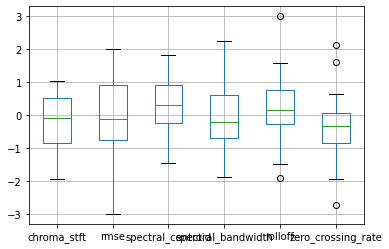

In [12]:
#boxplot by importing it ms its not précise
np.random.seed(235)
donnees = pd.DataFrame(np.random.randn(20,7),
                  columns=['', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate'])
boxplot = donnees.boxplot(column=['chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate'])


In [13]:
#here we define plot_boxplot() function

def plot_boxplot(features_raw, feature_normalize, column_names):
   features_sub = features_normalize.loc[:, column_names]
   print(features_sub)
   features_sub.head()
   features_sub.boxplot()
   for i,d in enumerate(features_sub):    
        y = features_sub.loc[features_raw['label'] == 'covid'][d]
        x = np.random.normal(i+1, 0.04, len(y))
        plt.plot(x, y, mec='k', ms=7, marker="o", linestyle="None")

     chroma_stft      rmse  spectral_centroid  spectral_bandwidth   rolloff  \
0       0.663986  0.188802           0.186009            0.211393  0.213377   
1       0.692280  0.006360           0.470885            0.647178  0.507308   
2       0.621541  0.138328           0.590468            0.779794  0.753526   
3       0.508926  0.031254           0.288470            0.611736  0.489552   
4       0.483011  0.123901           0.238033            0.390800  0.329993   
..           ...       ...                ...                 ...       ...   
159     0.614812  0.020110           0.183282            0.578477  0.315613   
160     0.445845  0.214793           0.420119            0.686824  0.567792   
161     1.000000  0.242134           0.514967            0.760069  0.705270   
162     0.490712  0.181794           0.533638            0.653595  0.601749   
163     0.508353  0.429628           0.496355            0.565683  0.549514   

     zero_crossing_rate  
0              0.208436  

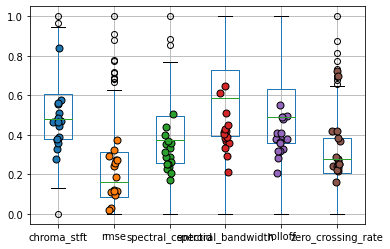

In [15]:
#function call to visualize the first part of features ( not including les 'mfcc')
# we notice thta spectral centroid 
plot_boxplot(df, features_normalize, ['chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate'])

        mfcc1     mfcc2     mfcc3     mfcc4     mfcc5     mfcc6     mfcc7  \
0    0.459825  0.626572  0.481154  0.228675  0.653384  0.548245  0.620193   
1    0.234931  0.333720  0.622753  0.541054  0.663707  0.575375  0.820859   
2    0.609317  0.262602  0.608738  0.270454  0.713056  0.504176  0.384775   
3    0.497768  0.598053  0.688862  0.300697  0.506593  0.857434  0.360066   
4    0.364913  0.313300  0.705479  0.248570  0.571690  0.624055  0.491718   
..        ...       ...       ...       ...       ...       ...       ...   
159  0.196018  0.673692  0.915793  0.345927  0.766551  0.764214  0.643325   
160  0.595814  0.477902  0.644062  0.258513  0.677588  0.749556  0.626539   
161  0.936035  0.380752  0.638774  0.301188  0.606660  0.640271  0.517591   
162  0.638137  0.321760  0.671637  0.286682  0.371133  0.501584  0.263727   
163  0.875949  0.338350  0.339102  0.277465  0.617166  0.384322  0.485417   

        mfcc8     mfcc9    mfcc10    mfcc11    mfcc12    mfcc13    mfcc14  

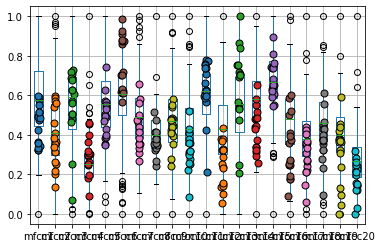

In [199]:
#call plot_box function, et column_names here are les mfcc ( mfcc_attributes)
mfcc_attributes = []
for i in range(1, 21):
    mfcc_attributes.append(f'mfcc{i}')
plot_boxplot(df, features_normalize, mfcc_attributes)

     chroma_stft      rmse  spectral_centroid  spectral_bandwidth   rolloff  \
0       0.663986  0.188802           0.186009            0.211393  0.213377   
1       0.692280  0.006360           0.470885            0.647178  0.507308   
2       0.621541  0.138328           0.590468            0.779794  0.753526   
3       0.508926  0.031254           0.288470            0.611736  0.489552   
4       0.483011  0.123901           0.238033            0.390800  0.329993   
..           ...       ...                ...                 ...       ...   
159     0.614812  0.020110           0.183282            0.578477  0.315613   
160     0.445845  0.214793           0.420119            0.686824  0.567792   
161     1.000000  0.242134           0.514967            0.760069  0.705270   
162     0.490712  0.181794           0.533638            0.653595  0.601749   
163     0.508353  0.429628           0.496355            0.565683  0.549514   

     zero_crossing_rate  
0              0.208436  

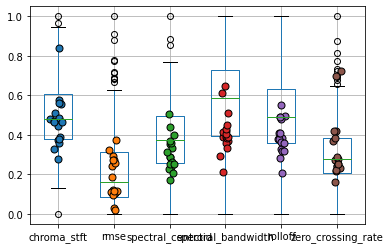

In [201]:
plot_boxplot(df, features_normalize, 
             ['chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate'])